In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3000)

# Utility functions

In [3]:
def emperical_mgf(X, t):
    if type(t) is not np.ndarray:
        t = np.array([t])
    return np.mean(np.exp(X.reshape(-1, 1)@t.reshape(1, -1)), axis=0)

def chi_square(n, N=100):
    return np.sum([np.power(np.random.normal(size=(N, )), 2) for _ in range(n)])

def check_sub_gaussianity(X, sigma, max_T=1, nPoints=100, plot=False):
    t = np.linspace(0, max_T, nPoints)
    
    mgf_X = emperical_mgf(X, t)
    mgf_gau = np.exp(0.5*np.power(sigma*t, 2))
    
    if plot:
        plt.figure(figsize=(10, 8))
        plt.plot(mgf_X, '-o', markevery=10, fillstyle='none', label=r'$\mathbb{E}\left[e^{\lambda\mathbb{X}}\right]$')
        plt.plot(mgf_gau, '-x', markevery=20, fillstyle='none', label=r'$e^{\frac{\sigma ^2\lambda ^2}{2}}$')
        plt.xlabel(r'$\lambda$', fontsize=15)
        plt.legend(fontsize=10)
        
    if np.all(mgf_X <= mgf_gau):
        print('Follows sub-gaussianity.')
    else:
        print("Doesn't follow sub-gaussianity!!")

# Q1

n = 1 Doesn't follow sub-gaussianity!!


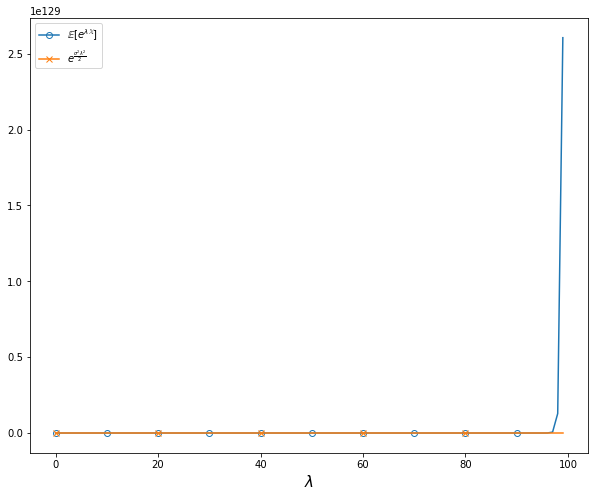

n = 2 Doesn't follow sub-gaussianity!!


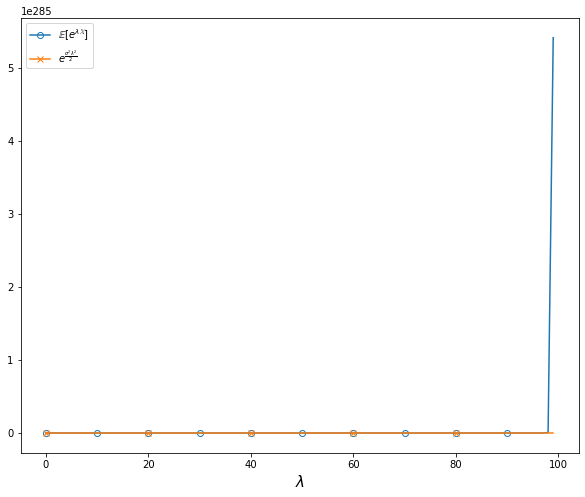

n = 3 Doesn't follow sub-gaussianity!!


/tmp/ipykernel_44225/937191692.py:4: RuntimeWarning: overflow encountered in exp
  return np.mean(np.exp(X.reshape(-1, 1)@t.reshape(1, -1)), axis=0)
/home/solomon/.local/share/miniconda3/envs/nag/lib/python3.8/site-packages/matplotlib/ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


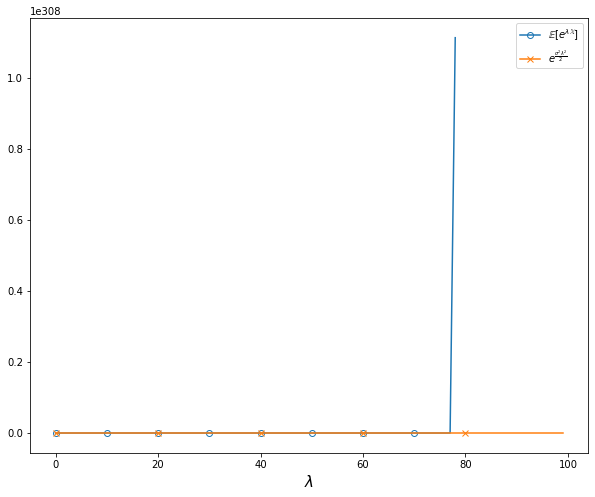

n = 4 

/tmp/ipykernel_44225/937191692.py:4: RuntimeWarning: overflow encountered in exp
  return np.mean(np.exp(X.reshape(-1, 1)@t.reshape(1, -1)), axis=0)


Doesn't follow sub-gaussianity!!


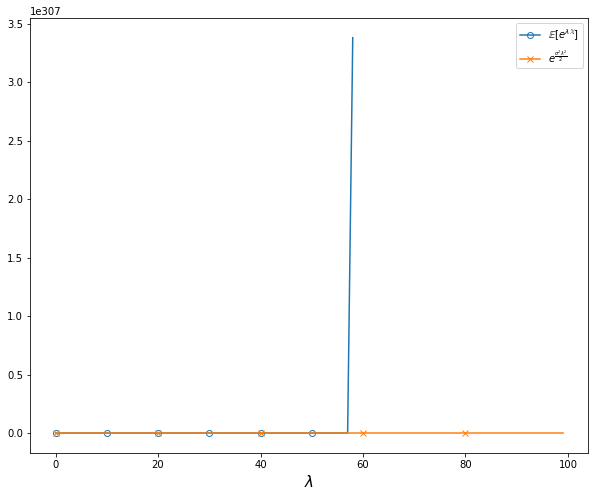

n = 5 Doesn't follow sub-gaussianity!!


/tmp/ipykernel_44225/937191692.py:4: RuntimeWarning: overflow encountered in exp
  return np.mean(np.exp(X.reshape(-1, 1)@t.reshape(1, -1)), axis=0)


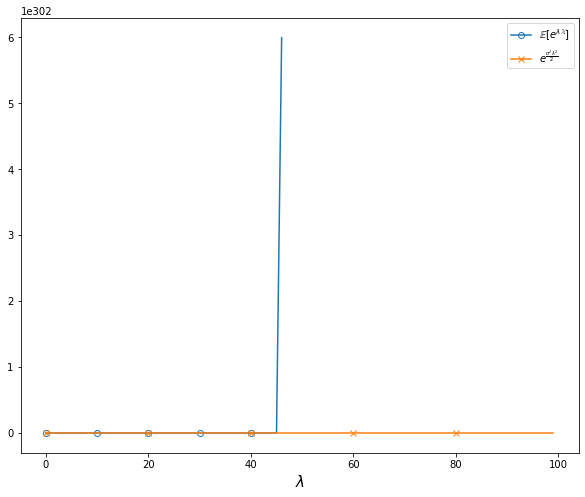

n = 6 Doesn't follow sub-gaussianity!!


/tmp/ipykernel_44225/937191692.py:4: RuntimeWarning: overflow encountered in exp
  return np.mean(np.exp(X.reshape(-1, 1)@t.reshape(1, -1)), axis=0)


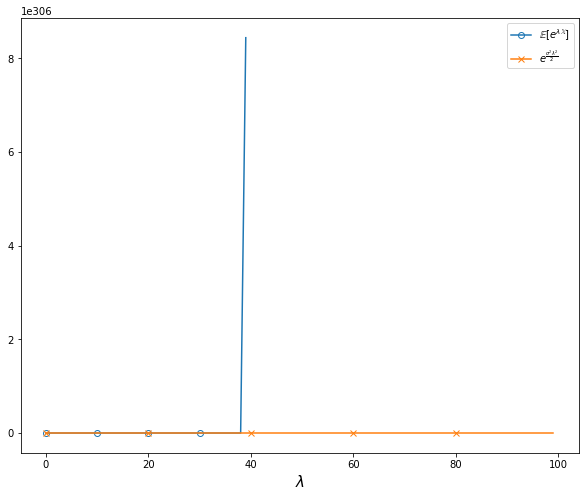

n = 7 Doesn't follow sub-gaussianity!!


/tmp/ipykernel_44225/937191692.py:4: RuntimeWarning: overflow encountered in exp
  return np.mean(np.exp(X.reshape(-1, 1)@t.reshape(1, -1)), axis=0)


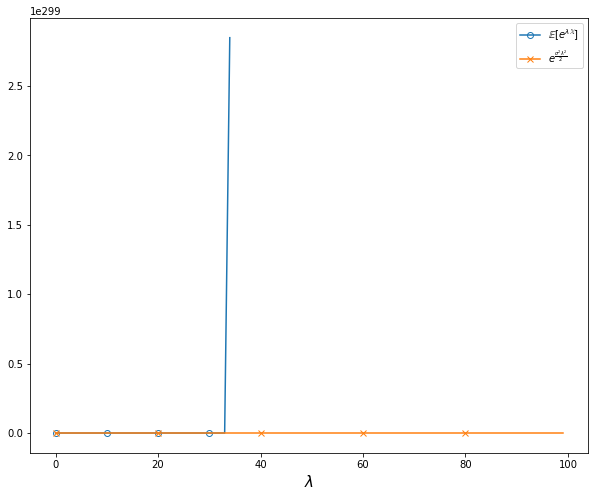

n = 8 Doesn't follow sub-gaussianity!!


/tmp/ipykernel_44225/937191692.py:4: RuntimeWarning: overflow encountered in exp
  return np.mean(np.exp(X.reshape(-1, 1)@t.reshape(1, -1)), axis=0)


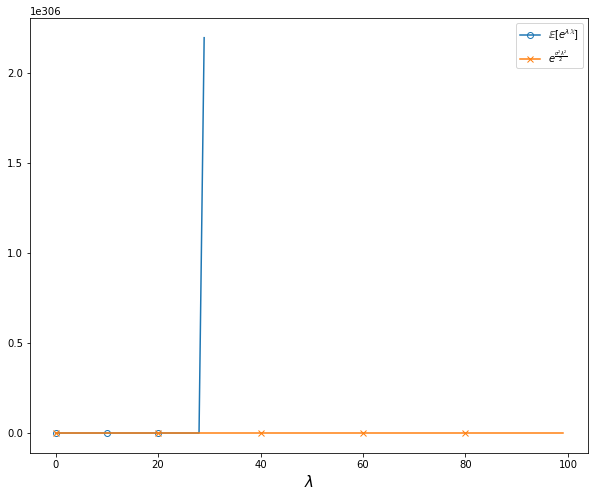

n = 9 Doesn't follow sub-gaussianity!!


/tmp/ipykernel_44225/937191692.py:4: RuntimeWarning: overflow encountered in exp
  return np.mean(np.exp(X.reshape(-1, 1)@t.reshape(1, -1)), axis=0)


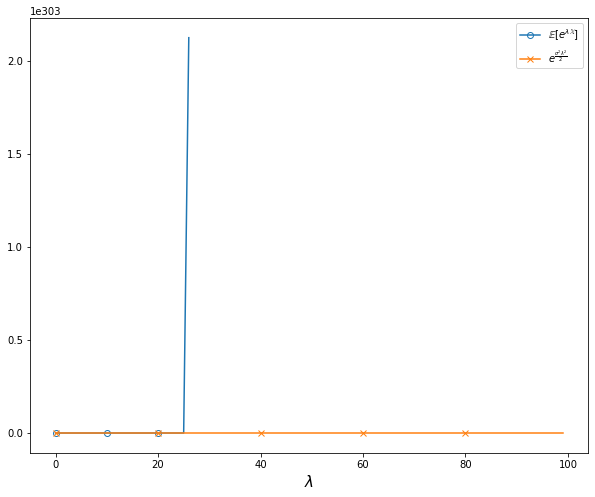

In [25]:
N = 1000
n_max = 10

sigma = 1

for i in range(1, n_max):
    X = chi_square(i, N=N)
    print("n = {}".format(i), end=" ")
    check_sub_gaussianity(X, sigma, plot=True, max_T=0.3)
    plt.show()

# Q2

Uniform random variable Follows sub-gaussianity.


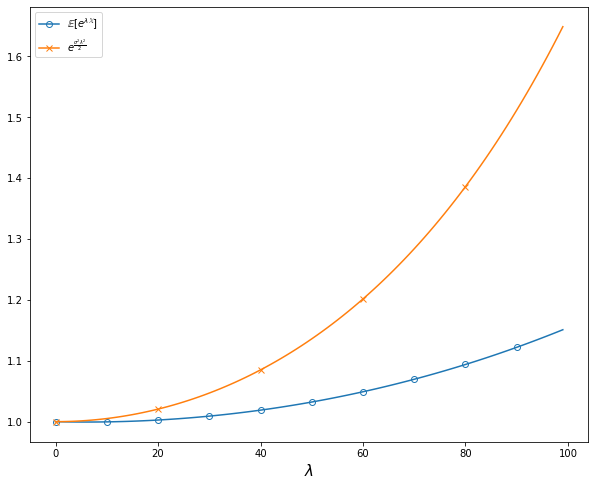

In [26]:
a = 1
sigma = 1

X = np.random.uniform(-1*a, a, size=(N,))
print("Uniform random variable", end=" ")
check_sub_gaussianity(X, sigma, plot=True, max_T=1)

Laplace random variable Doesn't follow sub-gaussianity!!


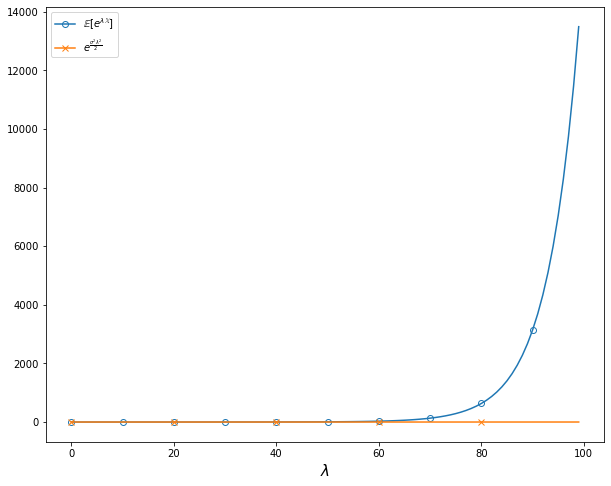

In [27]:
b = 1
sigma = 1

X = np.random.laplace(scale=2*b**2, size=(N,))
print("Laplace random variable", end=" ")
check_sub_gaussianity(X, sigma, plot=True, max_T=1)

# Q3

In [73]:
n = 100

X = np.sum(np.random.uniform(size=(N, n)), axis=1)

sigma = 1/2
sigma_term = n/12

b = np.ones((N, ))
a = np.zeros((N, ))

M = 1
mean = n/2

def hoeffding_bound(t, b, a):
    return np.exp(-2*np.power(t, 2)/(np.sum(b-a)))

def phi(x):
    return (1+x)*np.log(1+x) - x

def bennett_bound(t, M, sigma_term):
    return np.exp(-1*(sigma_term/np.power(M, 2))*phi(M*t/sigma_term))

def chernoff_bound(t, e, X):
    return np.exp(-1*t*e)*emperical_mgf(X, e)


def get_tail_probability(X, x):
    nSamples = X.shape[0]
    
    return np.sum(X >= x)/nSamples


n_t = 1000
t = np.linspace(0, 10, n_t)

h_b = hoeffding_bound(t, b, a)
b_b = bennett_bound(t, M, sigma_term)
e = 1e-3
c_b = chernoff_bound(t, e, X)

t_p = np.array([get_tail_probability(X, mean + t_i) for t_i in t])

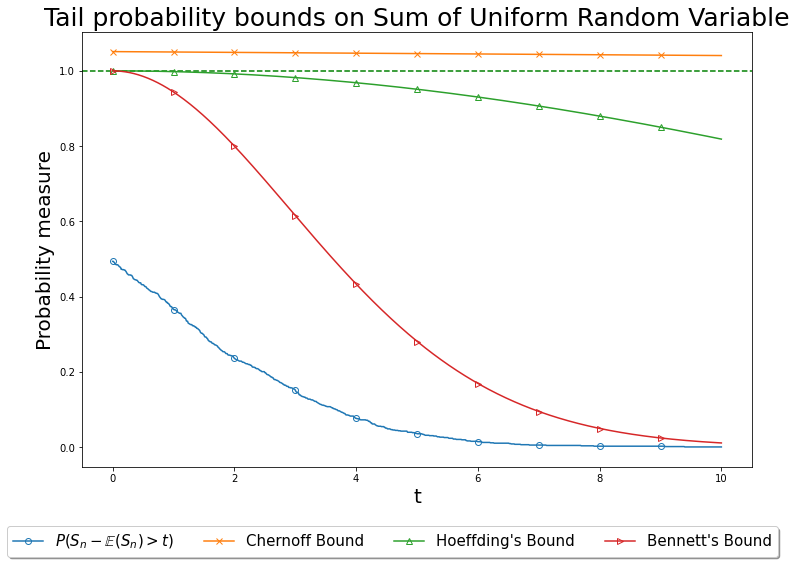

In [78]:
plt.figure(figsize=(12, 8))
plt.title('Tail probability bounds on Sum of Uniform Random Variable', fontsize=25)

plt.axhline(1, linestyle='--', color='g')
plt.plot(t, t_p, '-o', markevery=100, fillstyle='none', label=r'$P(S_n - \mathbb{E}(S_n) > t)$')
plt.plot(t, c_b, '-x', markevery=100, fillstyle='none',  label='Chernoff Bound')
plt.plot(t, h_b, '-^', markevery=100, fillstyle='none',  label="Hoeffding's Bound")
plt.plot(t, b_b, '->', markevery=100, fillstyle='none',  label="Bennett's Bound")
plt.ylabel('Probability measure', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, -0.12),
          fancybox=True, shadow=True, ncol=4, fontsize=15)